In [163]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
#Loading the data file into a data frame
loan = pd.read_csv("loan.csv",encoding="ISO-8859-1",delimiter = ",",low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [165]:
# This tells you the percentage of null values in each column
round(100 *(loan.isnull().sum(axis=0)/loan.shape[0]),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [166]:
# This is for checking which are the particular columns that has more than say 20% null entries
loan.columns[round(100 *(loan.isnull().sum(axis=0)/loan.shape[0]),2) > 20]

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
     

In [167]:
# Code for dropping columns which have more than say 20% null values
loan.drop(list(loan.columns[round(100 *(loan.isnull().sum(axis=0)/loan.shape[0]),2) > 20]), inplace=True, axis=1)

In [168]:
# Checking wheather the particular rows were dropped or not
round(100 *(loan.isnull().sum(axis=0)/loan.shape[0]),2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [169]:
#inspecting the data
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [170]:
round(100 *(loan.isnull().sum(axis=1)/loan.shape[0]),2)

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
5        0.00
6        0.00
7        0.00
8        0.00
9        0.00
10       0.00
11       0.00
12       0.00
13       0.00
14       0.00
15       0.00
16       0.00
17       0.00
18       0.00
19       0.00
20       0.00
21       0.00
22       0.00
23       0.00
24       0.00
25       0.00
26       0.00
27       0.00
28       0.00
29       0.00
         ... 
39687    0.01
39688    0.01
39689    0.01
39690    0.01
39691    0.01
39692    0.01
39693    0.01
39694    0.01
39695    0.01
39696    0.01
39697    0.01
39698    0.01
39699    0.01
39700    0.01
39701    0.01
39702    0.01
39703    0.01
39704    0.01
39705    0.01
39706    0.01
39707    0.01
39708    0.01
39709    0.01
39710    0.01
39711    0.01
39712    0.01
39713    0.01
39714    0.01
39715    0.01
39716    0.01
Length: 39717, dtype: float64

In [171]:
round(100 *(loan.isnull().sum(axis=1)/loan.shape[0]),2) > 1

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
39687    False
39688    False
39689    False
39690    False
39691    False
39692    False
39693    False
39694    False
39695    False
39696    False
39697    False
39698    False
39699    False
39700    False
39701    False
39702    False
39703    False
39704    False
39705    False
39706    False
39707    False
39708    False
39709    False
39710    False
39711    False
39712    False
39713    False
39714    False
39715    False
39716    False
Length: 39717, dtype: bool

In [172]:
#creating a sub data frame for further analysis on "Fully paid" and "Charged off" data
loan_dataset = loan.loc[loan['loan_status'].apply(lambda x: x.upper()).isin({'FULLY PAID' , 'CHARGED OFF'})]
loan_dataset.shape

(38577, 53)

In [173]:
#dropping columns containing single values
loan_dataset.drop(['collections_12_mths_ex_med',
                   'policy_code','application_type',
                   'acc_now_delinq','chargeoff_within_12_mths',
                   'delinq_amnt','tax_liens','url','title'],axis=1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0
10,1070078,1305201,6500,6500,6500.00000,60 months,14.65%,153.45,C,C3,...,7678.02,6500.00,1178.02,0.00,0.00,0.0000,Jun-13,1655.54,Dec-15,0.0


In [174]:
loan_dataset.drop(['url', 'title'], axis=1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
10,1070078,1305201,6500,6500,6500.00000,60 months,14.65%,153.45,C,C3,...,1655.54,Dec-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [175]:
loan_dataset.shape

(38577, 53)

In [176]:
#Converting int_rate into numeric type
loan_dataset['cleaned_int_rate'] = loan_dataset['int_rate'].apply(lambda x: float(x.split('%')[0]))

C:\Users\naikd5\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [177]:
#Converting reval_util into numeric type
loan_dataset['cleaned_revol_util'] = loan_dataset['revol_util'].astype(str).apply(lambda x: float(x.split('%')[0]))

C:\Users\naikd5\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [178]:
#Creating a sub data frame for Charged off data
charged_off_loans = loan_dataset.loc[loan_dataset['loan_status'].apply(lambda x: x.upper()) == 'CHARGED OFF']

In [179]:
charged_off_loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,cleaned_int_rate,cleaned_revol_util
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,15.27,9.4
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,21.28,32.6
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12.69,36.5
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,13.49,91.7
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,10.65,55.5


In [180]:
#Counting the total records for Charged off entries
len(set(charged_off_loans['member_id'])), charged_off_loans.shape[0], len(set(charged_off_loans['id']))

(5627, 5627, 5627)

In [181]:
#Creating a sub data frame for Fully paid data
fully_paid_loans = loan_dataset.loc[loan_dataset['loan_status'].apply(lambda x: x.upper()) == 'FULLY PAID']

In [182]:
fully_paid_loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,cleaned_int_rate,cleaned_revol_util
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,10.65,83.7
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,15.96,98.5
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,13.49,21.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,7.90,28.3
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,15.96,85.6


In [183]:
#Counting the total records for Fully paid entries
len(set(fully_paid_loans['member_id'])), fully_paid_loans.shape[0], len(set(fully_paid_loans['id']))

(32950, 32950, 32950)

In [184]:
#Calculating the percentage ratio of Fully paid entries against the loan data set excluding the current 
len(set(fully_paid_loans['id']))/len(set(loan_dataset.id))

0.8541358840760038

In [185]:
#Calculating the percentage ratio of Charged off entries against the loan data set excluding the current 
len(set(charged_off_loans['id']))/len(set(loan_dataset.id))

0.14586411592399617

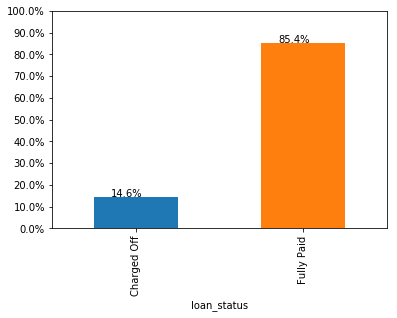

In [186]:
#Creating a overall snapshot of the percentage split between Charged off and Fully paid loan data (excl current) 
total = loan.loc[loan['loan_status'].apply(lambda x: x.upper()).isin({'FULLY PAID' , 'CHARGED OFF'})].shape[0]
ax = loan.loc[loan['loan_status'].apply(lambda x: x.upper()).isin({'FULLY PAID' , 'CHARGED OFF'})]\
    .groupby('loan_status').size().plot.bar()
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
ax.yaxis.set_ticks(np.linspace(0, total, 11))

_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

In [187]:
#Creating a sub data frame of loan records for vizualzing purpose grouped by purpose and loan status
purpose = loan.groupby(['purpose', 'loan_status']).agg({'id': 'size'}).unstack().reset_index()
purpose.columns = ['purpose', 'Charged Off', 'Current', 'Fully Paid']
purpose.fillna(0, inplace=True)
purpose['total'] = purpose['Charged Off'] + purpose['Current'] + purpose['Fully Paid']
purpose['change_off%'] = purpose['Charged Off']/purpose['total']
purpose['fully_paid%'] = purpose['Fully Paid']/purpose['total']
purpose

,purpose,Charged Off,Current,Fully Paid,total,change_off%,fully_paid%
0,car,160.0,50.0,1339.0,1549.0,0.103292,0.864429
1,credit_card,542.0,103.0,4485.0,5130.0,0.105653,0.874269
2,debt_consolidation,2767.0,586.0,15288.0,18641.0,0.148436,0.820128
3,educational,56.0,0.0,269.0,325.0,0.172308,0.827692
4,home_improvement,347.0,101.0,2528.0,2976.0,0.116599,0.849462
5,house,59.0,14.0,308.0,381.0,0.154856,0.808399
6,major_purchase,222.0,37.0,1928.0,2187.0,0.101509,0.881573
7,medical,106.0,12.0,575.0,693.0,0.152958,0.829726
8,moving,92.0,7.0,484.0,583.0,0.157804,0.830189
9,other,633.0,128.0,3232.0,3993.0,0.158527,0.809416


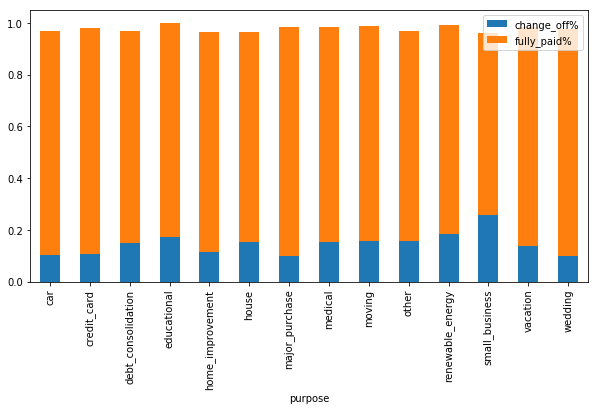

In [188]:
#Plotting the vizualization illustrating purpose aginst loan status by percentage
fig, ax = plt.subplots(figsize=(10, 5))
purpose.plot(x = 'purpose', y=['change_off%', 'fully_paid%'],kind='bar', ax=ax, stacked=True)

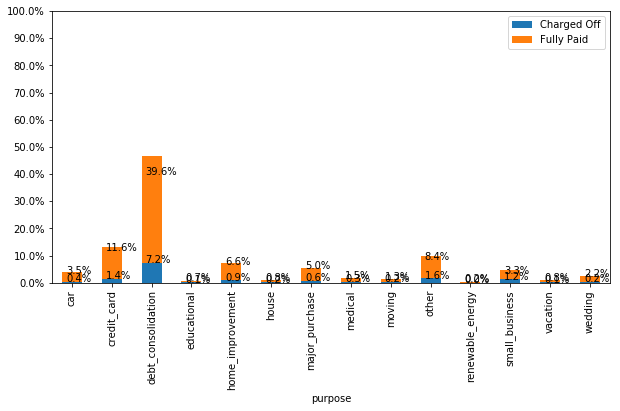

In [189]:
#Plotting another vizualization against purpose and loan status
fig, ax = plt.subplots(figsize=(10, 5))
purpose.plot(x = 'purpose', y=['Charged Off', 'Fully Paid'],kind='bar', ax=ax, stacked=True)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
ax.yaxis.set_ticks(np.linspace(0, total, 11))
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

In [190]:
#Creating a sub data frame of loan records for vizualzing purpose grouped by verifications status and loan status
verify = loan.groupby(['verification_status', 'loan_status']).agg({'id': 'size'}).unstack().reset_index()
verify.columns = ['verification', 'Charged Off', 'Current', 'Fully Paid']
verify

,verification,Charged Off,Current,Fully Paid
0,Not Verified,2142,227,14552
1,Source Verified,1434,310,8243
2,Verified,2051,603,10155


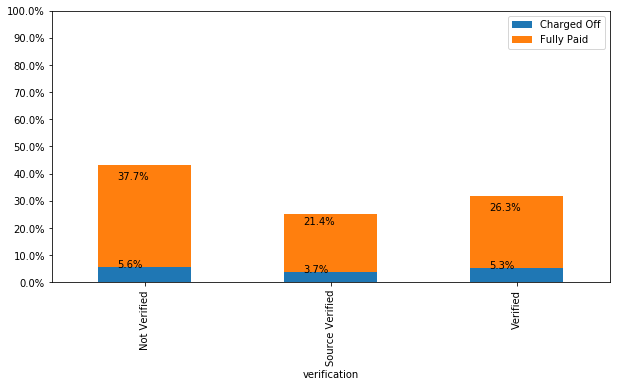

In [191]:
#Creating vizualization illustrating verification status aginst loan status
fig, ax = plt.subplots(figsize=(10, 5))
verify.plot(x = 'verification', y=['Charged Off', 'Fully Paid'],kind='bar', ax=ax, stacked=True)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
ax.yaxis.set_ticks(np.linspace(0, total, 11))
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

In [192]:
#Creating a sub data frame of loan records for vizualzing purpose grouped by term and loan status
term = loan.groupby(['term', 'loan_status']).agg({'id': 'size'}).unstack().reset_index()
term.columns = ['term', 'Charged Off', 'Current', 'Fully Paid']
term.fillna(0, inplace=True)
term

,term,Charged Off,Current,Fully Paid
0,36 months,3227.0,0.0,25869.0
1,60 months,2400.0,1140.0,7081.0


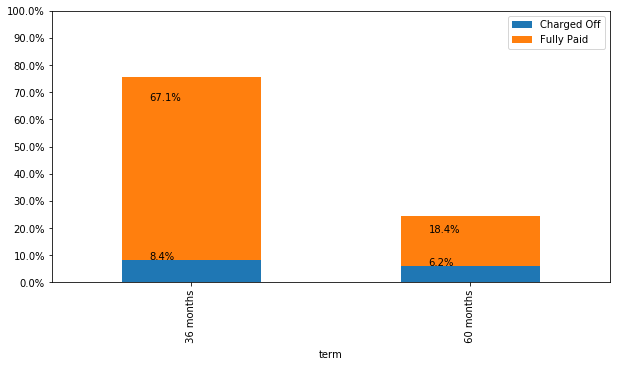

In [193]:
#Creating a vizualization illustrating term aginst loan statu
fig, ax = plt.subplots(figsize=(10, 5))
term.plot(x = 'term', y=['Charged Off', 'Fully Paid'],kind='bar', ax=ax, stacked=True)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
ax.yaxis.set_ticks(np.linspace(0, total, 11))
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

In [194]:
#Creating a sub data frame of loan records for vizualzing purpose grouped by grade and loan status
grade = loan.groupby(['grade', 'loan_status']).agg({'id': 'size'}).unstack().reset_index()
grade.columns = ['grade', 'Charged Off', 'Current', 'Fully Paid']
grade

,grade,Charged Off,Current,Fully Paid
0,A,602,40,9443
1,B,1425,345,10250
2,C,1347,264,6487
3,D,1118,222,3967
4,E,715,179,1948
5,F,319,73,657
6,G,101,17,198


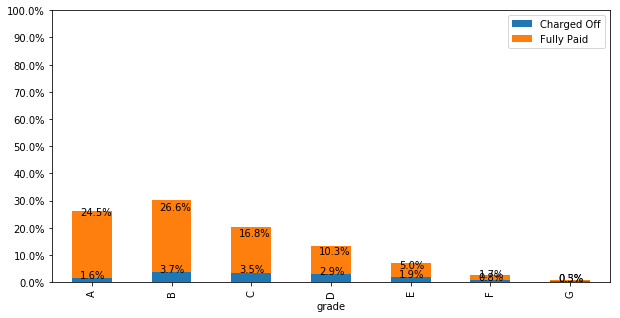

In [195]:
#Creating vizualization illustrating grade aginst loan statu
fig, ax = plt.subplots(figsize=(10, 5))
grade.plot(x = 'grade', y=['Charged Off', 'Fully Paid'],kind='bar', ax=ax, stacked=True)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
ax.yaxis.set_ticks(np.linspace(0, total, 11))
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

In [196]:
#Creating a sub data frame of loan records for vizualzing purpose grouped by sub_grade and loan status
sub_grade = loan.groupby(['sub_grade', 'loan_status']).agg({'id': 'size'}).unstack().reset_index()
sub_grade.columns = ['sub_grade', 'Charged Off', 'Current', 'Fully Paid']
sub_grade.fillna(0, inplace=True)
sub_grade

,sub_grade,Charged Off,Current,Fully Paid
0,A1,30.0,0.0,1109.0
1,A2,74.0,0.0,1434.0
2,A3,103.0,0.0,1707.0
3,A4,178.0,13.0,2695.0
4,A5,217.0,27.0,2498.0
5,B1,171.0,33.0,1626.0
6,B2,228.0,56.0,1773.0
7,B3,341.0,92.0,2484.0
8,B4,329.0,75.0,2108.0
9,B5,356.0,89.0,2259.0


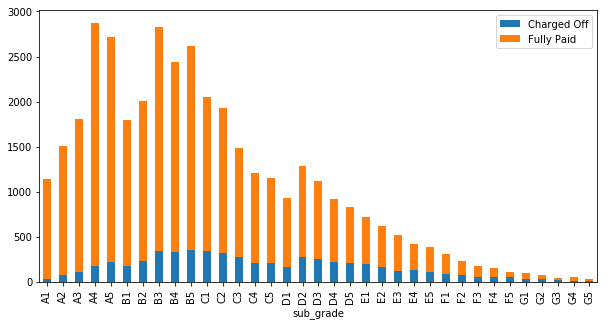

In [197]:
#Creating a vizualization illustrating sub grade aginst loan statu
fig, ax = plt.subplots(figsize=(10, 5))
sub_grade.plot(x = 'sub_grade', y=['Charged Off', 'Fully Paid'],kind='bar', ax=ax, stacked=True)

In [198]:
#Creating a sub data frame of loan records for vizualzing purpose grouped by home ownership and loan status
home_ownership = loan.groupby(['home_ownership', 'loan_status']).agg({'id': 'size'}).unstack().reset_index()
home_ownership.columns = ['home_ownership', 'Charged Off', 'Current', 'Fully Paid']
home_ownership.fillna(0, inplace=True)
home_ownership

,home_ownership,Charged Off,Current,Fully Paid
0,MORTGAGE,2327.0,638.0,14694.0
1,NONE,0.0,0.0,3.0
2,OTHER,18.0,0.0,80.0
3,OWN,443.0,83.0,2532.0
4,RENT,2839.0,419.0,15641.0


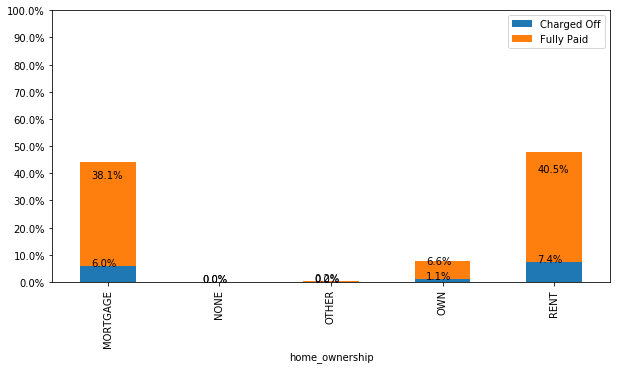

In [199]:
#Creating a vizualization illustrating home ownership aginst loan status
fig, ax = plt.subplots(figsize=(10, 5))
home_ownership.plot(x = 'home_ownership', y=['Charged Off', 'Fully Paid'],kind='bar', ax=ax, stacked=True)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
ax.yaxis.set_ticks(np.linspace(0, total, 11))
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

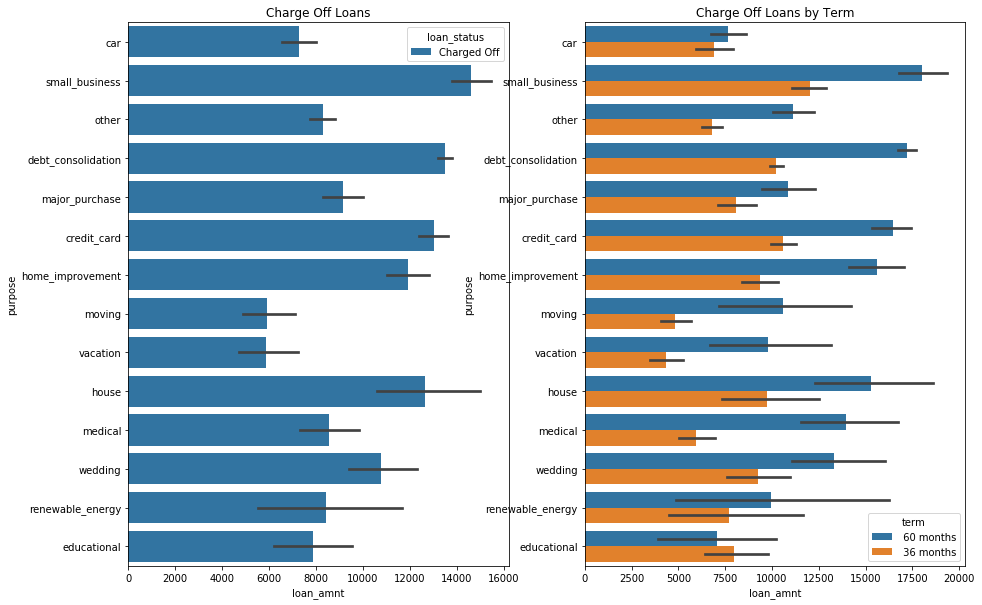

In [200]:
#Creating a vizualization to compare Charge off loans by purpose and comparing the purpose aginst terms
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.barplot(x='loan_amnt',y='purpose',hue='loan_status',data=charged_off_loans)
plt.title("Charge Off Loans")
plt.subplot(1,2,2)
sns.barplot(x='loan_amnt',y='purpose',hue='term',data=charged_off_loans)
plt.title("Charge Off Loans by Term")

plt.show()

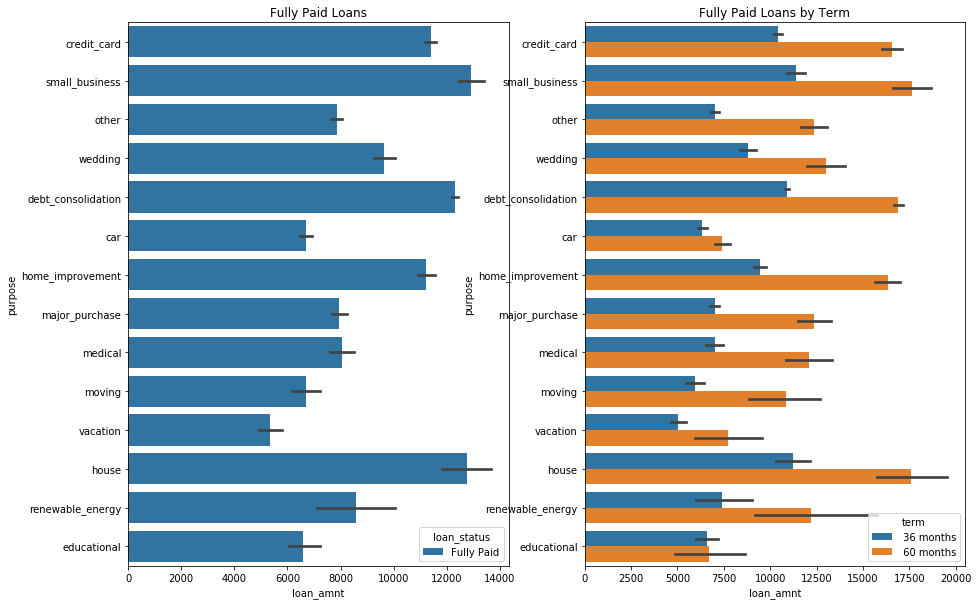

In [201]:
#Creating a vizualization to compare Fully Paid loans by purpose and comparing the purpose aginst terms
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(x='loan_amnt',y='purpose',hue='loan_status',data=fully_paid_loans)
plt.title("Fully Paid Loans")
plt.subplot(1,2,2)
sns.barplot(x='loan_amnt',y='purpose',hue='term',data=fully_paid_loans)
plt.title("Fully Paid Loans by Term")
plt.show()